# Main

In [86]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import networkx as nx
import os

In [87]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
L=['4','16','32','64','128'];
#L=['4','16'];


#-----cosas para graficar: 
#----A determinar Pc(inf), nu y tau
#Pc vs L ╬
#Pc vs dispersión
#Determinar nu (franco lo hace con log(Pc(L)-Pc(inf))) vs log L
#F(p) vs p
            
#----B determinar D (dimensión fractal)
#log(ns) vs log(s)
#chi^2 vs p

#----C obtener beta a partir de la P(inf)
#log M vs log L, donde M es la masa
#Pinf(p) vs (p-pc)
#log(Pinf(p)) vs log (p-pc)


# Ejercicio 1.

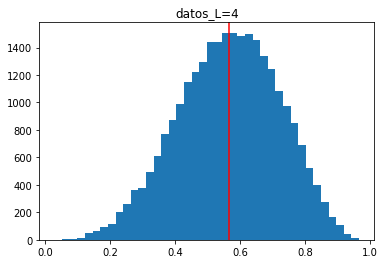

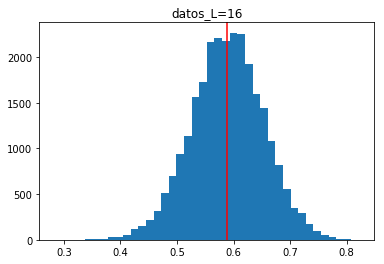

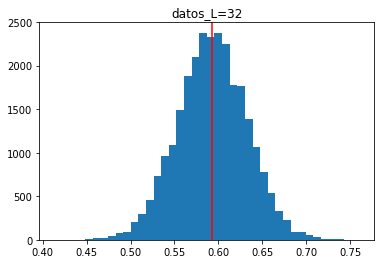

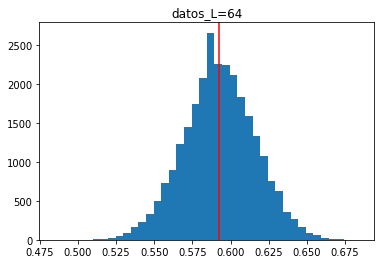

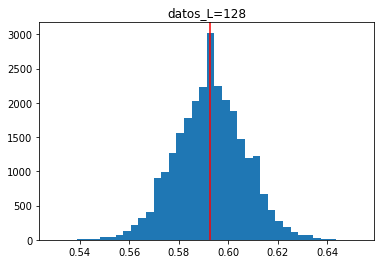

[[4, 0.564184115193718, 0.1548746915246145], [16, 0.588593296281206, 0.06384974570688383], [32, 0.5927316593821765, 0.039435612911127176], [64, 0.5926158742869843, 0.02343423829896684], [128, 0.5926359472553523, 0.01399070926885593]]


In [3]:
pc_mean = [];
pc_std = [];
pc_L =[]; 
#quiero promediar mis pc para cada L
for i,l in enumerate(L):
#l='4'
    with open (myFolder+'/datos_ej1/datos_ej1_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        pc_mean= np.mean(datos);
       # print(pc_mean)
        pc_std=np.std(datos);
        ls=[int(l), pc_mean, pc_std];
       # plt.subplot(5 1 i+1)
        plt.hist(datos,bins=40)
        plt.title('datos_L='+l)
        plt.axvline(pc_mean,color='red')
        plt.show()
    pc_L.append(ls)
    mf.close()
print(pc_L)

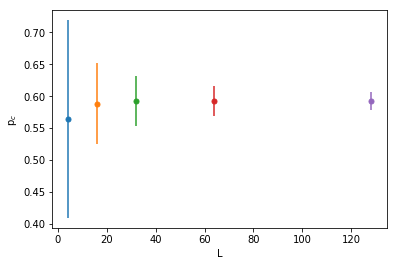

In [31]:
#grafiquemos
name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.scatter(pc_L[i][0],pc_L[i][1],s=25,label="L="+l)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2])
    
plt.xlabel('L')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


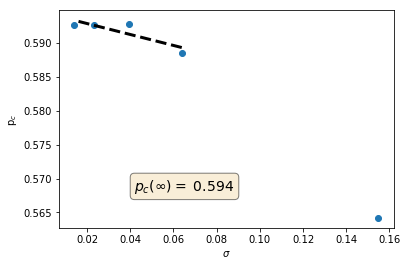

In [168]:
#grafiquemos
name='Pinf'
from scipy import optimize

x=[]
y=[]
fig=plt.figure()
for i in range(0,len(pc_L)):
    #plt.scatter(pc_L[i][2],pc_L[i][1],s=25,label="L="+l)
    x.append(pc_L[i][2]);
    y.append(pc_L[i][1]);

x_g=np.asarray(x);    
y_g=np.asarray(y);  
x=np.asarray(x)[1:6]; #estan desordenados, los ultimos son los primeros.
y=np.asarray(y)[1:6];    
fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
p0 = [1, 1] # Parametros iniciales para fitear
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
#p1 es [pendiente, origen]
plt.plot(x_g, y_g,'o', x, fitfunc(p1, x), "k--",linewidth=3) # ploteo la data y el ajuste
plt.xlabel('$\sigma$')
plt.ylabel('p$_{{c}}$')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.3, 0.3, '$p_{c}(\infty)=$ %0.3f' %round(p1[1],3), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.title(name)
plt.savefig(name+'_grafico.png')
plt.show()


In [134]:
print(p1)

[-0.08077586  0.59448569]


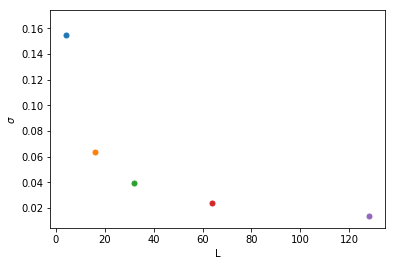

In [33]:
#grafiquemos
name='stdvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.scatter(pc_L[i][0],pc_L[i][2],s=25,label="L="+l)
    
plt.xlabel('L')
plt.ylabel('$\sigma$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


ValueError: 'ko' is not a valid estimator for `bins`

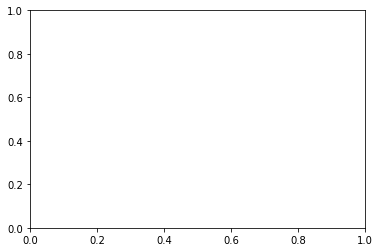

In [88]:
#name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.hist(pc_L[i][1],'ko', markersize=12)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2],ecolor='k')
   

# Ejercicio 2.

In [48]:
prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
percola_tot=[];
ns_total = [];

for j,l in enumerate(L):
    with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'.txt', 'r') as myfile: 
        probabilidad_L = [];
        fz_percolante_L =[];
        percola_L = [];
        ns_L = [];
        h=0;
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
    
            if largo > 1: #esto lo hice para evitar las filas de los 'x00'
                probabilidad_L.append(float(datos[0]));


                percola_L.append(float(datos[1]));
                ns_L.append([float (i) for i in datos[2:]]);                 
                h=h+1;
        print (h);
    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    percola_tot.append(percola_L);
    ns_total.append(ns_L);
    myfile.close()


91
91
91
91
91


Método 2

No handles with labels found to put in legend.


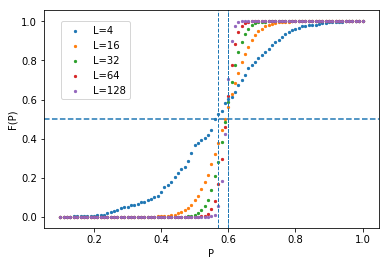

los p criticos son: [['4', 0.57, 0.05], ['16', 0.6, 0.05], ['32', 0.6, 0.05], ['64', 0.6, 0.05], ['128', 0.6, 0.05]]
y sus errores: [0.004999999999999949, 0.0050000000000000044, 0.0050000000000000044, 0.0050000000000000044, 0.0050000000000000044]


In [49]:
#grafiquemos
#promedio para cada L
#grafiquemos
#promedio para cada L
name1='FvsP'

plt.figure()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
pc_L2=[]
arg_p=[]
error=[]
for i,l in enumerate(L):
    k=0
    while percola_tot[i][k]<0.5:
        k+=1
    pc=(prob_total[i][k])
        #+prob_total[i][k])/2
    pc_L2.append([l,pc,0.05])
    arg_p.append(k)
    error.append((prob_total[i][k]-prob_total[i][k-1])/2)
    plt.scatter(prob_total[i],percola_tot[i],s=5,label="L="+l);
    plt.axvline(pc, linestyle='--',linewidth=1) 

#busco en esa lista todas las posiciones posibles para un pc y las promedio
#x=list(range(0,1));
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.axhline(0.5, linestyle='--') 

plt.xlabel('P')
plt.ylabel('F(P)')
#plt.legend('P_{c}=',pc)
plt.savefig(name1+'.png')    
plt.show()
    
print('los p criticos son:', pc_L2)
print('y sus errores:', error)

In [50]:
print([round(i[1],3) for i in pc_L2])
print([round(i[1],3) for i in pc_L])

[0.57, 0.6, 0.6, 0.6, 0.6]
[0.564, 0.589, 0.593, 0.593, 0.593]


Método 3

In [51]:
import math
name2='lognsvslogs'
#quiero graficar log(ns) vs log(s)
#for i,l in enumerate(L):
pc_L3=[]
for k,l in enumerate(L):
    Resultados=[]
    for i in range(40,70):
        ns=ns_total[k][i]
        log_ns=[]
        log_s=[]
        for j in range(1,len(ns) ):
            if(ns[j]>0):
                log_ns.append(np.log(ns[j]));
                log_s.append(np.log(j));

     #   print(log_s,log_s)
        [tau,q]=np.polyfit(log_s[0:30],log_ns[0:30],1)
        #plt.scatter(log_s,log_ns)
        chi=0
        for j in range(1,len(ns)):
            if(ns[j]>0):
                res=(np.log(ns[j])-(tau*np.log(j)+q))**2

            else:
                res=1
            chi+=res
        Resultados.append([i,tau,q,chi])
    pc=prob_total[k][(Resultados[np.argmin([i[3] for i in Resultados])][0])]
    pc_L3.append([l,pc,0.1])
    #plt.show()



10
50


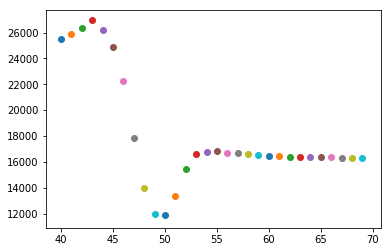

In [52]:
for j in range(0,len(Resultados)):
    #print( Resultados)
    plt.scatter(Resultados[j][0],Resultados[j][3])
print(np.argmin([i[3] for i in Resultados]))
print(Resultados[np.argmin([i[3] for i in Resultados])][0])

In [45]:
print([round(i[1],3) for i in pc_L])
print([round(i[1],3) for i in pc_L2])
print([round(i[1],3) for i in pc_L3])

[0.564, 0.589, 0.593, 0.593, 0.593]
[0.57, 0.6, 0.6, 0.6, 0.6]
[0.77, 0.72, 0.63, 0.6, 0.6]


In [46]:
import pandas as pd

info = pd.DataFrame({"L":L,"Método 1":[round(i[1],3) for i in pc_L],"Error 1":[round(i[2],3) for i in pc_L],"Método 2":[round(i[1],3) for i in pc_L2],"Error 2":[round(i[2],3) for i in pc_L2],"Método 3":[round(i[1],3) for i in pc_L3],"Error 3":[round(i[2],3) for i in pc_L3]},columns=['L','Método 1','Error 1','Método 2','Error 2','Método 3','Error 3'])
print(info)

     L  Método 1  Error 1  Método 2  Error 2  Método 3  Error 3
0    4     0.564    0.155      0.57     0.05      0.77      0.1
1   16     0.589    0.064      0.60     0.05      0.72      0.1
2   32     0.593    0.039      0.60     0.05      0.63      0.1
3   64     0.593    0.023      0.60     0.05      0.60      0.1
4  128     0.593    0.014      0.60     0.05      0.60      0.1


NameError: name 'PC' is not defined

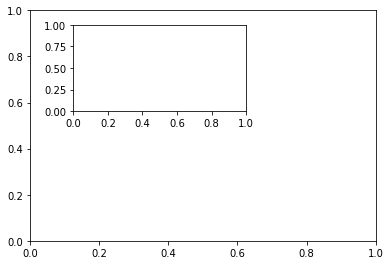

In [92]:
p0=['04','05','05','056','057','058' ]

            
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.55, 0.4, 0.3]) # inset axes
logL=[]
logM=[]
for i,l in enumerate(L):
    with open (myFolder+'/datos_ej2y3/Ej2y3_L='+l+'_p0='+p0[i]+'.txt', 'r') as myfile: 
   
        probabilidad_L = [];
        fz_percolante_L =[];
        percola_L = [];
        h=0;
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            probabilidad_L.append(float(datos[0]))    
            fz_percolante_L.append(float(datos[1]))    

        pc=PC[i]
        
        arg=probabilidad_L.index(pc)
        M=fz_percolante_L[arg]
        axes1.scatter(float(l),M)
        axes2.scatter(math.log(float(l)),math.log(M))

        logL.append(np.log(float(l)))
        logM.append(np.log(M))
[m,b]=np.polyfit(logL,logM,1)
axes1.plot(np.linspace(0,130),np.exp(b)*np.linspace(0,130)**m) 
axes1.text(3,3500,'D='+str(round(m,3)),bbox=dict(facecolor='wheat', alpha=0.5))
#axes1.title('Distribución')
axes2.set_xlabel("log(L)")
axes2.set_ylabel("log(M)")

axes2.plot(np.linspace(1.3,5),m*np.linspace(1.5,5)+b)
axes1.set_xlabel("L")
axes1.set_ylabel("M")
axes1.set_title('Ajuste lineal de la Masa en función de la longitud')
plt.show()

In [58]:
91/48

1.8958333333333333

ValueError: x and y must be the same size

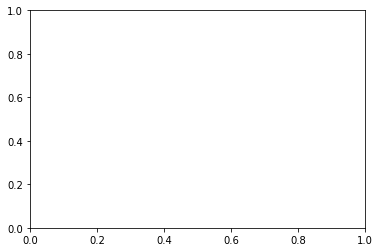

In [85]:
#grafiquemos

name1='Cluster_percolante'

plt.figure()
for i,l in enumerate(L):
    p=prob_total[i]
    pinf=[i/(int(l)**2) for i in fz_perc_total[i]]
    plt.scatter(p,pinf,s=5)
    
    plt.show()

 #   plt.leggend(l)
plt.xlabel('P')
plt.ylabel('P_inf')
#plt.legend('P_{c}=',pc)
plt.savefig(name1+'_'+l+'.png') 


In [125]:
m

-0.12591833552829088

### Ejercicio 4 y 5 

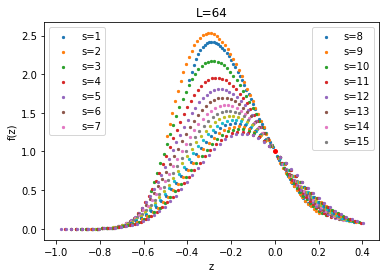

In [90]:
tau=2.1
pc=(59-20)
sigma=0.34
fig = plt.figure()
ax = fig.add_subplot(111)
for j in range(1,16):
    f=[]
    z=[]
    for i in range(0,56):
        f.append(float(ns_L[i][j])/float(ns_L[pc][j]))
        z.append(j**sigma*(probabilidad_L[i]-probabilidad_L[pc]))
    plt.scatter(z,f, s=5)


a=['s='+str(x) for x in list(range(1,8))]
b=['s='+str(x) for x in list(range(8,16))]
leg1 = plt.legend(a,loc=2)
leg2 = plt.legend(b,loc=1)
ax.add_artist(leg1)

plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('L=64')
plt.savefig('f(z).png')    

plt.show()

ValueError: math domain error

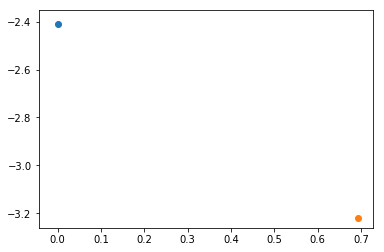

In [91]:
import math
ns=np.asarray(ns_L)
s=1
x=[]
y=[]
for eses in ns.T[1:15]:
    #print (eses)
    p_max=probabilidad_L[np.argmax(eses)]
   # print(p_max)
    p_graf=(p_max-0.59)
   # print(p_graf)
    plt.scatter(math.log(s),math.log(-p_graf))
    x.append(math.log(s))
    y.append(math.log(-p_graf))
  
    s+=1
valores=np.polyfit(x,y,1)
pol=np.poly1d(valores)
plt.plot(np.linspace(0,2.7),pol(np.linspace(0,2.7)))
plt.xlabel('log(s)')
plt.ylabel('$log(pc)$-$log(p_max)%')
plt.text(1.2,-1.2,'sigma='+str(round(-valores[0],3)))
plt.show()

368.01059
198.822968
121.729294
81.696877
58.24791
43.592148
33.851265
27.071072
22.089998
18.367792
15.515507
13.29819
11.463416
10.02888


/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power


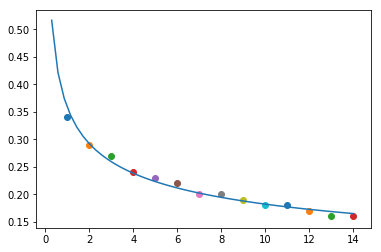

In [87]:
import math
ns=np.asarray(ns_L)
s=1
ns_max=[]
p_maxi=[]
for eses in ns.T[1:15]:
    #print (eses)
    p_max=probabilidad_L[np.argmax(eses)]
    print(np.max(eses))
    ns_max.append(np.max(eses))
    p_maxi.append(p_max)
   # print(p_max)
    p_graf=(p_max-0.59)
   # print(p_graf)
    try:
        plt.scatter((s),(-p_graf))
    except:
        print(s,p_graf)
    s+=1
plt.plot(np.linspace(0,14),math.e**valores[1]*(np.linspace(0,14))**valores[0])

In [88]:
tau=2.1
pc=(59-20)
sigma=-valores[0]
f_max=[]
z_max=[]
for i in range(1,14):
    f_max.append(float(ns_max[i-1])/float(ns_L[pc][i]))
    z_max.append(i**sigma*(p_maxi[i-1]-probabilidad_L[pc]))
   

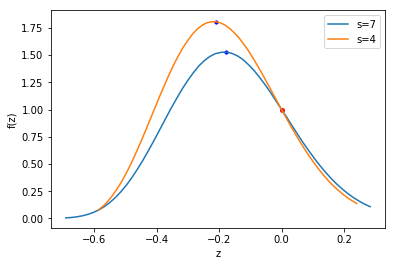

In [89]:
tau=2.1
pc=(59-20)
sigma=-valores[0]
for j in [7,4]:
    f=[]
    z=[]
    for i in range(0,56):
        f.append(float(ns_L[i][j])/float(ns_L[pc][j]))
        z.append(j**sigma*(probabilidad_L[i]-probabilidad_L[pc]))
    plt.plot(z,f,label=('s='+str(j)))
    plt.scatter(z_max[j-1],f_max[j-1],s=10,c='blue')

plt.legend()
plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

In [76]:
for j in range(0,5):
    ns=ns_total[j]
    i=0
    momentos=[]
    
    for tira in ns:
        p=prob_total[i][j]
        i+=1
        m2=0
        for k in range(0,len(tira)):
            m2=m2+tira[k]*(k**2);
        momentos.append(m2)
    plt.plot(prob_total_[i],momentos)    

IndexError: list index out of range

# Renormalizacion

In [174]:
import scipy.optimize as optimize


#defino mi funcion 1
def func1(x):
    return 4*(1-x)*x**3+x**4

# This finds the value of x such that func(x) = x, that is, where
# 4*(1-x)*x**3+x**4
print(optimize.fixed_point(func1,0.6))
# 0.682327803828


#defino mi funcion 2
def func2(x):
    return 2*x**2-x**4
print(optimize.fixed_point(func2,0.7))


0.7675918792439982
0.6180339887498952
